In [ ]:
# 80% accuracy at least

In [1]:
import cv2
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import preprocessing

import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms

import PIL

In [16]:
# for visulization
img = cv2.imread('/home/rico-li/Job/Metal/Image/GB/GB_Q0685-1090323111500372.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(1872, 3328, 3)

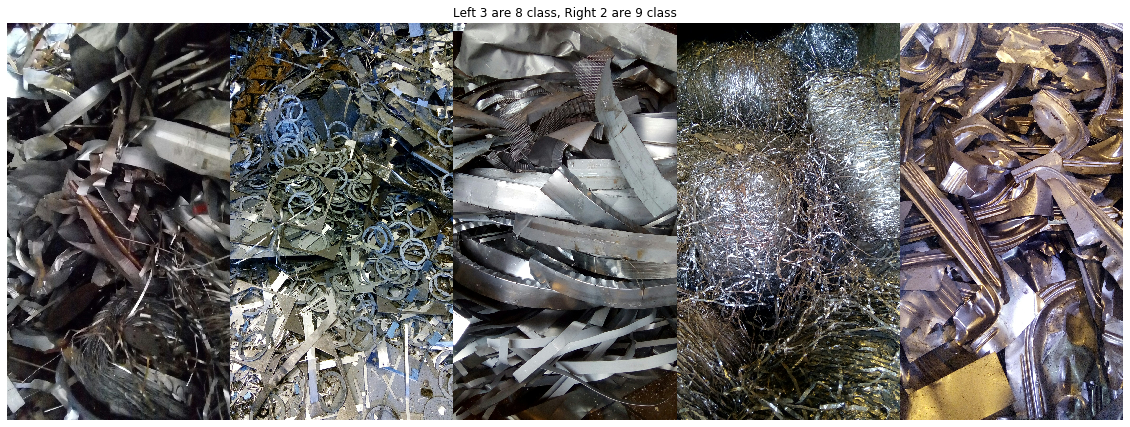

In [5]:
# for visulization
img1 = cv2.imread('/home/rico-li/Job/Metal/Image/THK/THK_Q0685-1090328142013206.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('/home/rico-li/Job/Metal/Image/THK/THK_Q2339-1090323153318526.jpg', cv2.IMREAD_COLOR)
img3 = cv2.imread('/home/rico-li/Job/Metal/Image/THK/THK_Q0696-1090327084706062.jpg', cv2.IMREAD_COLOR)

img4 = cv2.imread('/home/rico-li/Job/Metal/Image/THS/THS_Q2591-1090327090602313.jpg', cv2.IMREAD_COLOR)
img5 = cv2.imread('/home/rico-li/Job/Metal/Image/THS/THS_Q1581-1090327163850625.jpg', cv2.IMREAD_COLOR)

img  = np.concatenate((img1, img2, img3, img4, img5), axis=1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

figure(figsize=(20, 20))

plt.imshow(img)
plt.title('Left 3 are 8 class, Right 2 are 9 class')
plt.axis('off')
plt.show()

In [4]:
data = ImageFolder(root = '/home/rico-li/Job/Metal/stealimage_clustered')

# print(np.array(data[0][0]))
# there are 8511 samples
print(len(data))
print(data.classes)
print(len(data.classes)) 
print(data.class_to_idx)
# for Image floder
# classes: ['GB', 'PS', 'SDA', 'SDB', 'SDC', 'T1H', 'T2H', 'THF', 'THK', 'THS', 'TPI', 'TTA', 'TTC', 'TTP', 'TTR']
# 15 classes
# {'GB': 0, 'PS': 1, 'SDA': 2, 'SDB': 3, 'SDC': 4, 'T1H': 5, 'T2H': 6, 'THF': 7, 'THK': 8, 'THS': 9, 'TPI': 10, 'TTA': 11, 'TTC': 12, 'TTP': 13, 'TTR': 14}
#
# for stealimage_clustered folder
# classes: ['GB0', 'GB1', 'GB2', 'PS0', 'PS1', 'PS2', 'PS3', 'SDA0', 'SDA1', 'SDA2', 'SDA3', 'SDA4', 'SDA5', 'SDA6', 'SDB0', 'SDB1', 'SDB2', 'SDB3', 'SDB4', 'SDC0', 'SDC1', 'SDC2', 'SDC3', 'SDC4', 'SDC5', 'SDC6', 'T1H0', 'T1H1', 'T1H2', 'T1H3', 'T2H0', 'T2H1', 'T2H2', 'T2H3', 'T2H4', 'THF0', 'THF1', 'THF2', 'THF3', 'THK0', 'THK1', 'THK2', 'THK3', 'THS0', 'THS1', 'THS2', 'THS3', 'THS4', 'TPI0', 'TPI1', 'TTA0', 'TTA1', 'TTA2', 'TTA3', 'TTC0', 'TTC1', 'TTC2', 'TTC3', 'TTC4', 'TTP0', 'TTP1', 'TTP2', 'TTR0', 'TTR1', 'TTR2', 'TTR3']
# 66 classes
# {'GB0': 0, 'GB1': 1, 'GB2': 2, 'PS0': 3, 'PS1': 4, 'PS2': 5, 'PS3': 6, 'SDA0': 7, 'SDA1': 8, 'SDA2': 9, 'SDA3': 10, 'SDA4': 11, 'SDA5': 12, 'SDA6': 13, 'SDB0': 14, 'SDB1': 15, 'SDB2': 16, 'SDB3': 17, 'SDB4': 18, 'SDC0': 19, 'SDC1': 20, 'SDC2': 21, 'SDC3': 22, 'SDC4': 23, 'SDC5': 24, 'SDC6': 25, 'T1H0': 26, 'T1H1': 27, 'T1H2': 28, 'T1H3': 29, 'T2H0': 30, 'T2H1': 31, 'T2H2': 32, 'T2H3': 33, 'T2H4': 34, 'THF0': 35, 'THF1': 36, 'THF2': 37, 'THF3': 38, 'THK0': 39, 'THK1': 40, 'THK2': 41, 'THK3': 42, 'THS0': 43, 'THS1': 44, 'THS2': 45, 'THS3': 46, 'THS4': 47, 'TPI0': 48, 'TPI1': 49, 'TTA0': 50, 'TTA1': 51, 'TTA2': 52, 'TTA3': 53, 'TTC0': 54, 'TTC1': 55, 'TTC2': 56, 'TTC3': 57, 'TTC4': 58, 'TTP0': 59, 'TTP1': 60, 'TTP2': 61, 'TTR0': 62, 'TTR1': 63, 'TTR2': 64, 'TTR3': 65}



6499
['GB0', 'GB1', 'GB2', 'PS0', 'PS1', 'PS2', 'PS3', 'SDA0', 'SDA1', 'SDA2', 'SDA3', 'SDA4', 'SDA5', 'SDA6', 'SDB0', 'SDB1', 'SDB2', 'SDB3', 'SDB4', 'SDC0', 'SDC1', 'SDC2', 'SDC3', 'SDC4', 'SDC5', 'SDC6', 'T1H0', 'T1H1', 'T1H2', 'T1H3', 'T2H0', 'T2H1', 'T2H2', 'T2H3', 'T2H4', 'THF0', 'THF1', 'THF2', 'THF3', 'THK0', 'THK1', 'THK2', 'THK3', 'THS0', 'THS1', 'THS2', 'THS3', 'THS4', 'TPI0', 'TPI1', 'TTA0', 'TTA1', 'TTA2', 'TTA3', 'TTC0', 'TTC1', 'TTC2', 'TTC3', 'TTC4', 'TTP0', 'TTP1', 'TTP2', 'TTR0', 'TTR1', 'TTR2', 'TTR3']
66
{'GB0': 0, 'GB1': 1, 'GB2': 2, 'PS0': 3, 'PS1': 4, 'PS2': 5, 'PS3': 6, 'SDA0': 7, 'SDA1': 8, 'SDA2': 9, 'SDA3': 10, 'SDA4': 11, 'SDA5': 12, 'SDA6': 13, 'SDB0': 14, 'SDB1': 15, 'SDB2': 16, 'SDB3': 17, 'SDB4': 18, 'SDC0': 19, 'SDC1': 20, 'SDC2': 21, 'SDC3': 22, 'SDC4': 23, 'SDC5': 24, 'SDC6': 25, 'T1H0': 26, 'T1H1': 27, 'T1H2': 28, 'T1H3': 29, 'T2H0': 30, 'T2H1': 31, 'T2H2': 32, 'T2H3': 33, 'T2H4': 34, 'THF0': 35, 'THF1': 36, 'THF2': 37, 'THF3': 38, 'THK0': 39, 'THK1'

In [3]:
samples_list = data.samples
df = pd.DataFrame(samples_list, columns = ['ID', 'label'])
df

,ID,label
0,/home/rico-li/Job/Metal/stealimage_clustered/G...,0
1,/home/rico-li/Job/Metal/stealimage_clustered/G...,0
2,/home/rico-li/Job/Metal/stealimage_clustered/G...,0
3,/home/rico-li/Job/Metal/stealimage_clustered/G...,0
4,/home/rico-li/Job/Metal/stealimage_clustered/G...,0
...,...,...
6494,/home/rico-li/Job/Metal/stealimage_clustered/T...,65
6495,/home/rico-li/Job/Metal/stealimage_clustered/T...,65
6496,/home/rico-li/Job/Metal/stealimage_clustered/T...,65
6497,/home/rico-li/Job/Metal/stealimage_clustered/T...,65


In [70]:
# output df
df.to_csv('metalData.csv')


In [2]:
# readin df
df = pd.read_csv('metalData.csv')

print(df.info())
print('\n')
label = df['label'].value_counts(normalize=False, sort=True, ascending=True)
label.sort_index(axis=0, inplace=True)
label = label.astype(np.float32)
label = torch.from_numpy(label.to_numpy())
print(label*0.1)
# the minimum of samples in a class (class 10) is 16 (0.1%)
# the maimum of samples in (class 9) is 1941 (23%)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8511 entries, 0 to 8510
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8511 non-null   int64 
 1   ID          8511 non-null   object
 2   label       8511 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 199.6+ KB
None


tensor([ 42.6000,  21.1000,  29.3000,  55.7000,  30.3000,  94.5000,  40.7000,
        138.0000,  78.4000, 194.1000,   1.6000,  96.3000,   8.9000,  11.7000,
          7.9000])


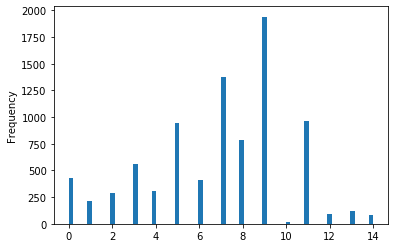

In [3]:
df['label'].plot.hist(bins=66)

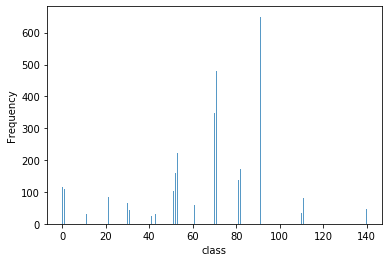

In [4]:
newlabels = torch.load('oneDfea_newlab_train_metal_train_False')
newlabels = newlabels.numpy()

import matplotlib.mlab as mlab

# the histogram of the data
n, bins, patches = plt.hist(newlabels, bins=500, alpha=0.75)
# l = plt.plot(bins, 'r--', linewidth=1)

plt.xlabel('class')
plt.ylabel('Frequency')
plt.show()


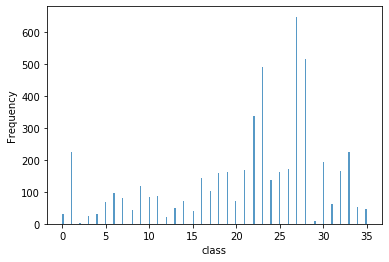

In [2]:
newlabels = torch.load('oneDfea_train_label36')
newlabels = newlabels.numpy()

import matplotlib.mlab as mlab
n, bins, patches = plt.hist(newlabels, bins=250, alpha=0.75)

plt.xlabel('class')
plt.ylabel('Frequency')
plt.show()


In [4]:
# dealing with image

In [26]:
data = ImageFolder(root = '/home/rico-li/Job/Metal/Image', transform=ToTensor())

# image shape: (3, 3328, 1872)
# some image shape: (3, 1872, 3328)

# i = 0
# allSize = []
# for img, _ in data:
#     i += 1
    
#     if img.shape[1] < img.shape[2]:
#         img = img.permute(0, 2, 1).contiguous() # make the memory contiguous
#     else:
#         pass
#     allSize.append(img.shape)
#     if i > 15:
#         break

# for i in allSize:
#     print(i)

<class 'int'>


In [17]:
data = ImageFolder(root = '/home/rico-li/Job/Metal/Image', 
                    transform= transforms.Compose([ transforms.Resize((512, 512), interpolation=PIL.Image.NEAREST),ToTensor()
    ]))


loader = DataLoader(data, batch_size=50, num_workers=0, shuffle=False)

mean = 0.0
i = 0
for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    i += 1
    print(i)
mean = mean / len(loader.dataset)

var = 0.0
j = 0
for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    var += ((images - mean.unsqueeze(1))**2).sum([0,2])
    j += 1
    print(j)

std = torch.sqrt(var / (len(loader.dataset)*128*128))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133


In [18]:
print(mean, std)

tensor([0.3835, 0.3737, 0.3698]) tensor([1.0265, 1.0440, 1.0499])


In [ ]:
# Wrong?
# mean = tensor([0.3835, 0.3737, 0.3698])
# std = tensor([0.2196, 0.2224, 0.2270])

# using now
# mean = tensor([0.3835, 0.3737, 0.3698])
# std = tensor([1.0265, 1.0440, 1.0499])